## Spaceship Titanic
---
> Kaggle data contest : [링크](https://www.kaggle.com/competitions/spaceship-titanic/overview)

## 1. 데이터 분석

#### 피처 설명

- **PassengerId** : 각 승객의 고유 ID. 각 Id는 승객이 함께 여행하는 그룹을 나타내고 그룹 내의 번호를 나타내는 형식을 취합니다. 그룹의 사람들은 종종 가족 구성원이지만 항상 그런 것은 아닙니다.
- **HomePlanet** : 승객이 출발한 행성으로, 일반적으로 승객이 거주하는 행성입니다.
- **CryoSleep** : 승객이 항해 기간 동안 정지된 애니메이션을 선택했는지 여부를 나타냅니다. cryosleep의 승객은 객실에 갇혀 있습니다.
- **Cabin** : 승객이 머무르는 캐빈 번호. 형식을 취합니다 deck/num/side. 여기 에서 Port 또는 Starboard 가 side될 수 있습니다.
- **Destination** : 승객이 내릴 행성.
- **Age** : 승객의 나이.
- **VIP** : 승객이 항해 중 특별 VIP 서비스 비용을 지불했는지 여부.
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** : 승객이 Spaceship Titanic 의 다양한 고급 편의 시설 각각에 대해 청구한 금액입니다.
- **Name** : 승객의 성과 이름.
- **<span style='color:red'>Transported</span>** : 승객이 다른 차원으로 이동했는지 여부. 이것은 목표, 예측하려는 열입니다

In [1]:
# DataFrame으로 데이터 세트 로딩

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

spaceship_df = pd.read_csv('./spaceship_train.csv')
spaceship_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [3]:
# 로딩된 데이터 피처(칼럼)의 타입 확인

print('\n ---데이터 정보--- \n')
print(spaceship_df.info())


 ---데이터 정보--- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


- **HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name** 피처는 결손값(NaN)을 가지고 있다. 이에 대한 보정이 필요하다.

In [5]:
# 주요 피처들의 결손값 처리

spaceship_df['HomePlanet'].fillna('N', inplace=True)
spaceship_df['CryoSleep'].fillna('N', inplace=True)
spaceship_df['Cabin'].fillna('N', inplace=True)
spaceship_df['Destination'].fillna('N', inplace=True)
spaceship_df['Age'].fillna(spaceship_df['Age'].mean(), inplace=True)
spaceship_df['VIP'].fillna('N', inplace=True)
spaceship_df['Transported'].fillna(0, inplace=True)

In [6]:
# 주요 피처들의 값 분류 확인

print(spaceship_df.columns.values)
print('---')
print(spaceship_df['HomePlanet'].value_counts())
print('---')
print(spaceship_df['CryoSleep'].value_counts())
print('---')
print(spaceship_df['Cabin'].str[0].value_counts())
print('---')
print(spaceship_df['Destination'].value_counts())
print('---')
print(spaceship_df['Age'].value_counts())
print('---')
print(spaceship_df['VIP'].value_counts())
print('---')
print(spaceship_df['Transported'].value_counts())

['PassengerId' 'HomePlanet' 'CryoSleep' 'Cabin' 'Destination' 'Age' 'VIP'
 'RoomService' 'FoodCourt' 'ShoppingMall' 'Spa' 'VRDeck' 'Name'
 'Transported']
---
Earth     4602
Europa    2131
Mars      1759
N          201
Name: HomePlanet, dtype: int64
---
False    5439
True     3037
N         217
Name: CryoSleep, dtype: int64
---
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
N     199
T       5
Name: Cabin, dtype: int64
---
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
N                 182
Name: Destination, dtype: int64
---
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 81, dtype: int64
---
False    8291
N         203
True      199
Name: VIP, dtype: int64
---
True     4378
False    4315
Name: Transported, dtype: int64


### 전송여부(Transported)를 기준으로 다양한 피처들의 상관관계 분석

Text(0.5, 1.0, 'Target distribution')

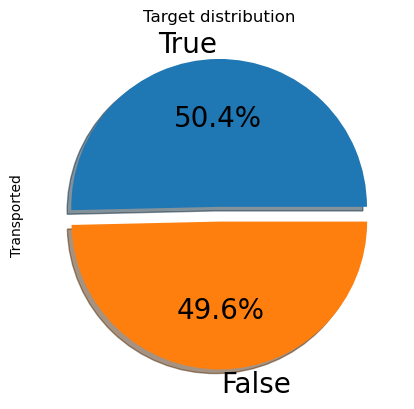

In [9]:
# 전체 전송된 승객들의 비율 확인

spaceship_df['Transported'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  textprops={'fontsize':20}).set_title("Target distribution")

Text(0.5, 0, 'Age')

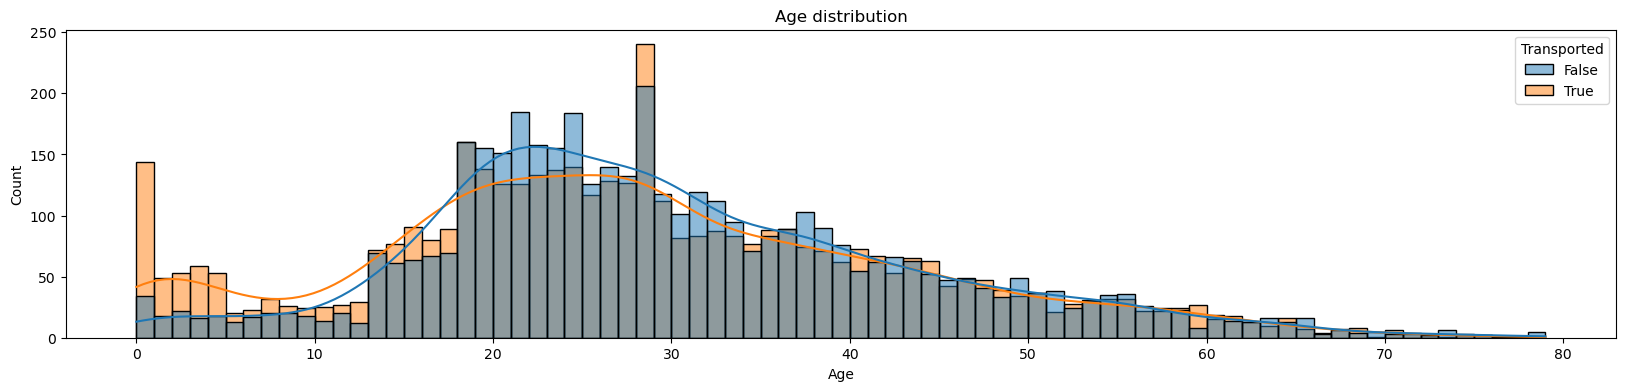

In [11]:
# Age와 전송 여부 관계

# 그래프의 크기 설정
plt.figure(figsize=(20,4))
sns.histplot(data=spaceship_df, x='Age', hue='Transported', binwidth=1, kde=True, bins=80)

# 기타 타이틀 적기
plt.title('Age distribution')
plt.xlabel('Age')

**젊은 사람들의 생존이 조금 더 많고 전반적으로 정규분포를 따름**

<function matplotlib.pyplot.show(close=None, block=None)>

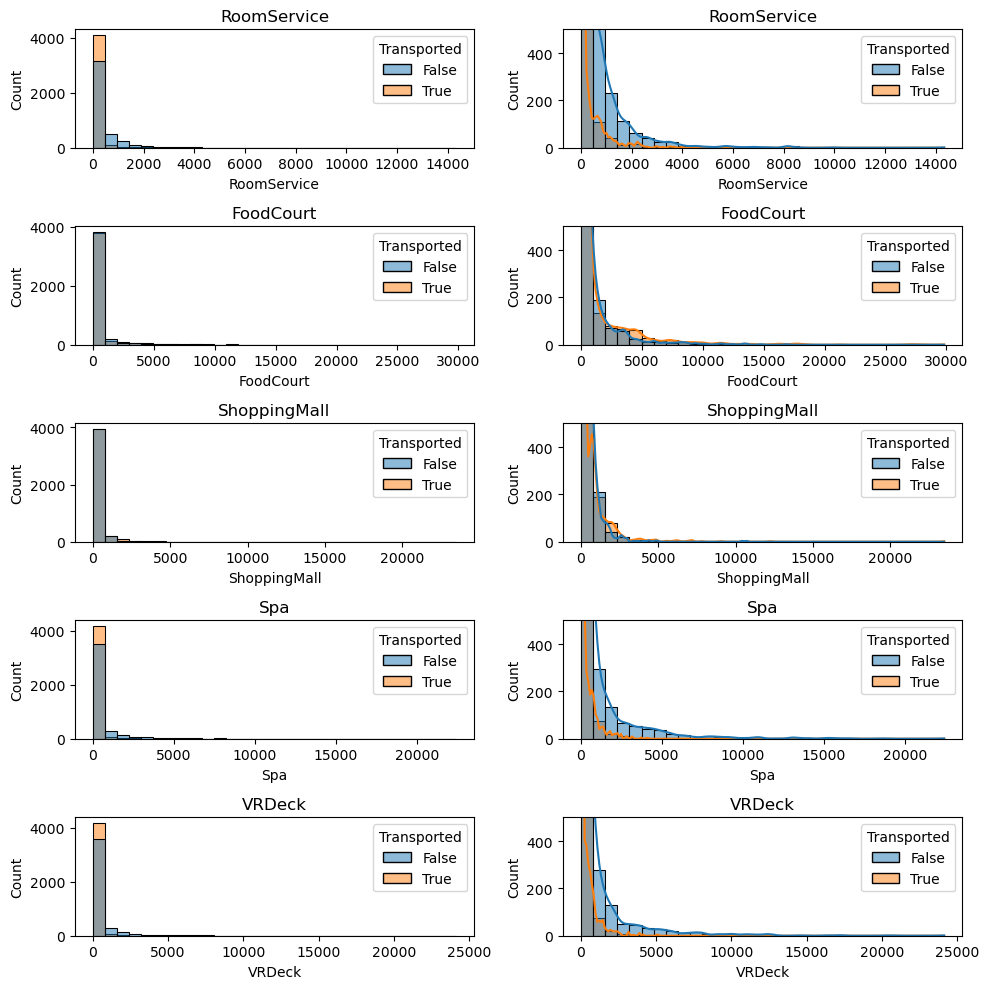

In [14]:
# 지출(5개 피처)과 전송 여부 관계

cona_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] # 금액 관련 칼럼을 전부 끌어모아 함수를 재설정

fig=plt.figure(figsize=(10, 10)) # 그래프 크기 설정
for i, var_name in enumerate(cona_feats):
    ax=fig.add_subplot(5,2,2*i+1) 
    sns.histplot(data=spaceship_df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=spaceship_df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,500])
    ax.set_title(var_name)
fig.tight_layout()
plt.show

**지출이 적을 수록 전송 인원이 더 많음**

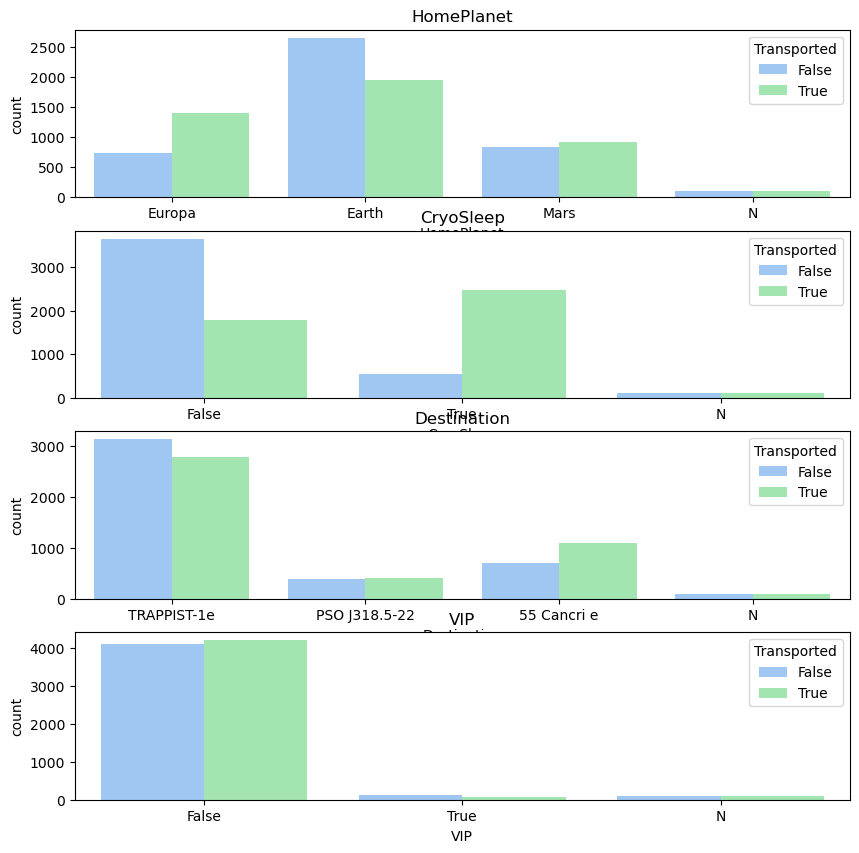

In [21]:
# 나머지 피처들과 전송 여부와의 관계

cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig=plt.figure(figsize=(10,10))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=spaceship_df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
plt.style.use('seaborn-pastel')
plt.show()

- Homeplanet : 유로파 1>0 / 지구 1<0 / 화성 1>0
- CryoSleep : 극저온수면 함 1>0 / 극저온수면하지 못함 1<0